<a href="https://colab.research.google.com/github/PaulVMathew05/Unsupervised_Learning_Assignment_Paul_V_Mathew/blob/main/Unsupervised_Learning_Assignment_Paul_V_Mathew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import seaborn as sns
import pandas as pd
iris = sns.load_dataset('iris')
print(iris.head())
print(iris.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [10]:
from sklearn.preprocessing import StandardScaler
features = iris.drop(columns=['species'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print(scaled_df.head())

   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444
2     -1.385353     0.328414     -1.397064    -1.315444
3     -1.506521     0.098217     -1.283389    -1.315444
4     -1.021849     1.249201     -1.340227    -1.315444


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

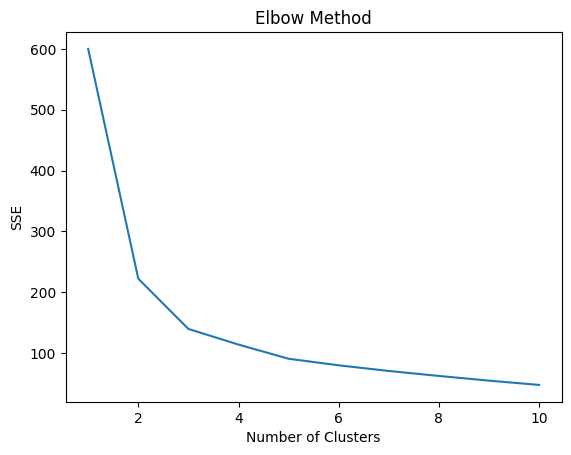

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    sse.append(km.inertia_)
plt.plot(k_range, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


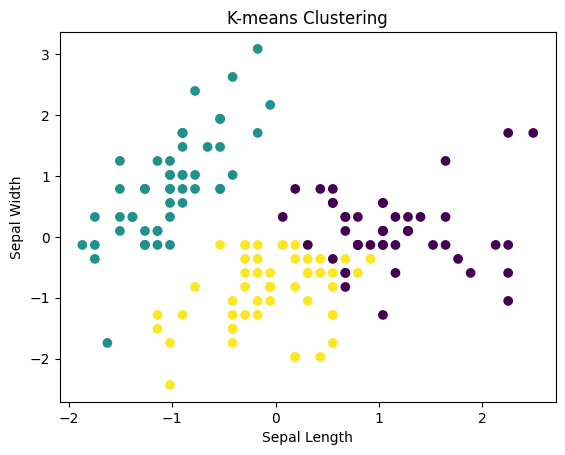

In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
iris['kmeans_cluster'] = clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering')
plt.show()

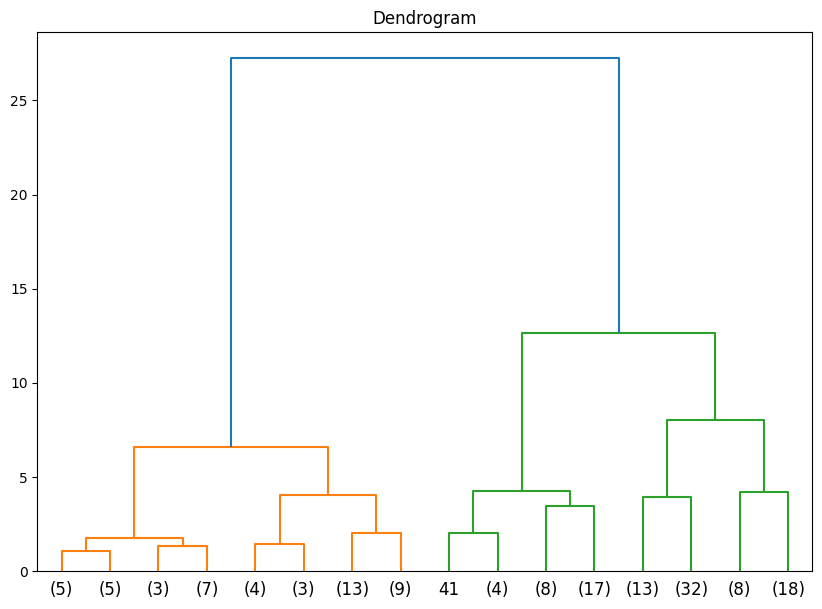

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(scaled_features, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=3)
plt.title('Dendrogram')
plt.show()

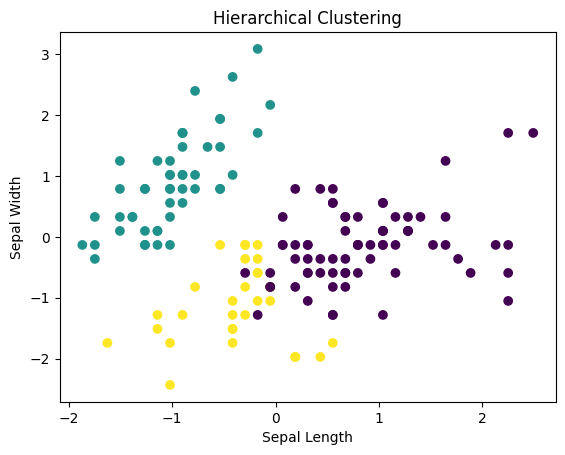

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_clusters = AgglomerativeClustering(n_clusters=optimal_clusters)
iris['hierarchical_cluster'] = hierarchical_clusters.fit_predict(scaled_features)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=iris['hierarchical_cluster'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Hierarchical Clustering')
plt.show()

In [ ]:
kmeans_mean = iris.drop(columns=['species']).groupby('kmeans_cluster').mean()
hierarchical_mean = iris.drop(columns=['species']).groupby('hierarchical_cluster').mean()
print("K-means Clustering Means:")
print(kmeans_mean)
print("\nHierarchical Clustering Means:")
print(hierarchical_mean)
kmeans_counts = iris['kmeans_cluster'].value_counts()
hierarchical_counts = iris['hierarchical_cluster'].value_counts()
print("\nK-means Cluster Counts:")
print(kmeans_counts)
print("\nHierarchical Cluster Counts:")
print(hierarchical_counts)

K-means Clustering Means:
                sepal_length  sepal_width  petal_length  petal_width  \
kmeans_cluster                                                         
0                   6.780851     3.095745      5.510638     1.972340   
1                   5.006000     3.428000      1.462000     0.246000   
2                   5.801887     2.673585      4.369811     1.413208   

                hierarchical_cluster  
kmeans_cluster                        
0                            0.00000  
1                            1.02000  
2                            1.09434  

Hierarchical Clustering Means:
                      sepal_length  sepal_width  petal_length  petal_width  \
hierarchical_cluster                                                         
0                         6.546479     2.992958      5.267606     1.854930   
1                         5.016327     3.451020      1.465306     0.244898   
2                         5.530000     2.566667      3.930000     1.206667